In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
# 最大値で割る
max_displacement = size_x_data2.max()
size_x_data1 = size_x_data1/max_displacement
size_x_data2 = size_x_data2/max_displacement
size_x_data3 = size_x_data3/max_displacement
position_x_data1 = position_x_data1/max_displacement
position_x_data2 = position_x_data2/max_displacement
position_x_data3 = position_x_data3/max_displacement
position_one_data1 = position_one_data1/max_displacement
position_one_data2 = position_one_data2/max_displacement
position_one_data3 = position_one_data3/max_displacement
position_two_data1 = position_two_data1/max_displacement
position_two_data2 = position_two_data2/max_displacement
position_two_data3 = position_two_data3/max_displacement
position_three_data1 = position_three_data1/max_displacement
position_three_data2 = position_three_data2/max_displacement
position_three_data3 = position_three_data3/max_displacement
position_four_data1 = position_four_data1/max_displacement
position_four_data2 = position_four_data2/max_displacement
position_four_data3 = position_four_data3/max_displacement
position_five_data1 = position_five_data1/max_displacement
position_five_data2 = position_five_data2/max_displacement
position_five_data3 = position_five_data3/max_displacement

# 実験2:差をとると精度が向上するか
# size_x_data = (size_x_data-no_hole_data)
# position_x_data = (position_x_data-no_hole_data)

# position_one_data = (position_one_data-no_hole_data)
# position_two_data = (position_two_data-no_hole_data)
# position_three_data = (position_three_data-no_hole_data)
# position_four_data = (position_four_data-no_hole_data)
# position_five_data = (position_five_data-no_hole_data)
position_y_data = position_y_data/50

### train用とtest用に分割(4:1)
size_x_train1, size_x_test1, size_x_train2, size_x_test2, size_x_train3, size_x_test3, size_y_train, size_y_test = train_test_split(size_x_data1, size_x_data2, size_x_data3, size_y_data, test_size=0.20)
position_x_train1, position_x_test1, position_x_train2, position_x_test2, position_x_train3, position_x_test3, position_y_train, position_y_test = train_test_split(position_x_data1, position_x_data2, position_x_data3, position_y_data, test_size=0.20)


In [7]:
print(size_x_train1.shape)
print(size_x_test1.shape)
print(position_five_data1.shape)
print(position_four_data1.shape)
print(position_three_data1.shape)
print(position_two_data1.shape)
print(position_one_data1.shape)

(2155, 1251)
(539, 1251)
(484, 1251)
(529, 1251)
(529, 1251)
(576, 1251)
(576, 1251)


In [ ]:
### reshape(数を見て修正する必要あり)
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1)            1252        input_4[0][0]                    
____________________________________________________________________________________________

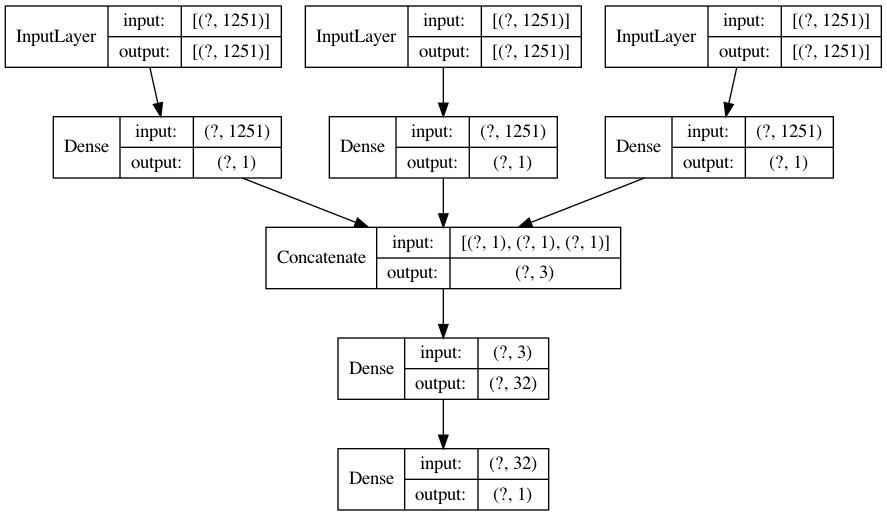

In [9]:
#単純モデル
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,))
input2 = Input(shape=(1251,))
input3 = Input(shape=(1251,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Dense(1, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Dense(1, activation="linear")(input3)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
w = Dense(32, activation="tanh")(combined)
w = Dense(1, activation="linear")(w)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input, z.input], outputs=w)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.summary()
plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_27 (InputLayer)           [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 1251, 32)     128         input_25[0][0]                   
___________________________________________________________________________________________

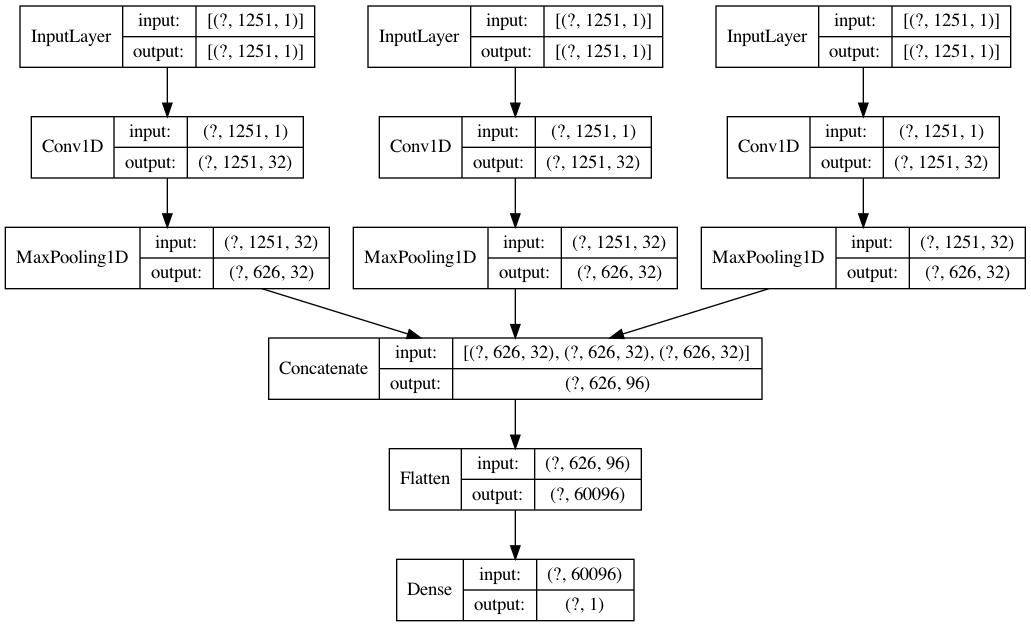

In [31]:
# CNNモデルで大きさ推定
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(1, activation="linear")(cnn)

# モデル定義とコンパイル
cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_size_model.summary()
plot_model(cnn_size_model, show_shapes=True, show_layer_names=False)

In [32]:
size_history = cnn_size_model.fit([size_x_train1, size_x_train2, size_x_train3], size_y_train, epochs=1000, validation_data=([size_x_test1,size_x_test2,size_x_test3], size_y_test))

Epoch 1/1000
68/68 [==============================] - 2s 36ms/step - loss: 2.5179 - acc: 0.2056 - val_loss: 1.9836 - val_acc: 0.2263
Epoch 2/1000
68/68 [==============================] - 2s 34ms/step - loss: 1.9872 - acc: 0.2107 - val_loss: 2.0170 - val_acc: 0.2263
Epoch 3/1000
68/68 [==============================] - 2s 34ms/step - loss: 1.9386 - acc: 0.2107 - val_loss: 1.9367 - val_acc: 0.2263
Epoch 4/1000
68/68 [==============================] - 2s 34ms/step - loss: 1.8929 - acc: 0.2107 - val_loss: 1.8764 - val_acc: 0.2263
Epoch 5/1000
68/68 [==============================] - 2s 35ms/step - loss: 1.8809 - acc: 0.2107 - val_loss: 1.9658 - val_acc: 0.2263
Epoch 6/1000
68/68 [==============================] - 2s 36ms/step - loss: 1.8222 - acc: 0.2107 - val_loss: 1.9873 - val_acc: 0.2263
Epoch 7/1000
68/68 [==============================] - 3s 41ms/step - loss: 1.7991 - acc: 0.2107 - val_loss: 1.7664 - val_acc: 0.2263
Epoch 8/1000
68/68 [==============================] - 3s 38ms/step - 

68/68 [==============================] - 2s 34ms/step - loss: 1.0008 - acc: 0.2107 - val_loss: 1.4359 - val_acc: 0.2263
Epoch 63/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.9657 - acc: 0.2107 - val_loss: 1.1630 - val_acc: 0.2263
Epoch 64/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.9644 - acc: 0.2107 - val_loss: 0.9756 - val_acc: 0.2263
Epoch 65/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.9647 - acc: 0.2107 - val_loss: 0.9966 - val_acc: 0.2263
Epoch 66/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.9122 - acc: 0.2107 - val_loss: 0.9434 - val_acc: 0.2263
Epoch 67/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.9160 - acc: 0.2107 - val_loss: 0.9312 - val_acc: 0.2263
Epoch 68/1000
68/68 [==============================] - 2s 36ms/step - loss: 0.9286 - acc: 0.2107 - val_loss: 0.9063 - val_acc: 0.2263
Epoch 69/1000
68/68 [==============================] - 480s 7s/step - loss: 

68/68 [==============================] - 3s 41ms/step - loss: 0.7689 - acc: 0.2097 - val_loss: 0.7552 - val_acc: 0.2263
Epoch 124/1000
68/68 [==============================] - 3s 46ms/step - loss: 0.8801 - acc: 0.2102 - val_loss: 0.8135 - val_acc: 0.2263
Epoch 125/1000
68/68 [==============================] - 3s 38ms/step - loss: 0.7750 - acc: 0.2102 - val_loss: 0.7531 - val_acc: 0.2263
Epoch 126/1000
68/68 [==============================] - 3s 40ms/step - loss: 0.8153 - acc: 0.2097 - val_loss: 0.9103 - val_acc: 0.2263
Epoch 127/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.8067 - acc: 0.2102 - val_loss: 0.8859 - val_acc: 0.2263
Epoch 128/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.7961 - acc: 0.2102 - val_loss: 0.7995 - val_acc: 0.2263
Epoch 129/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.8375 - acc: 0.2097 - val_loss: 0.7827 - val_acc: 0.2263
Epoch 130/1000
68/68 [==============================] - 2s 33ms/step -

Epoch 184/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6859 - acc: 0.2102 - val_loss: 0.6688 - val_acc: 0.2263
Epoch 185/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6560 - acc: 0.2097 - val_loss: 0.6912 - val_acc: 0.2263
Epoch 186/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6643 - acc: 0.2102 - val_loss: 1.0069 - val_acc: 0.2263
Epoch 187/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6979 - acc: 0.2102 - val_loss: 0.9701 - val_acc: 0.2263
Epoch 188/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.7560 - acc: 0.2097 - val_loss: 0.6808 - val_acc: 0.2263
Epoch 189/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.7052 - acc: 0.2102 - val_loss: 0.8834 - val_acc: 0.2263
Epoch 190/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.7533 - acc: 0.2093 - val_loss: 0.6612 - val_acc: 0.2263
Epoch 191/1000
68/68 [==============================] -

Epoch 245/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6157 - acc: 0.2097 - val_loss: 0.6461 - val_acc: 0.2263
Epoch 246/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6407 - acc: 0.2093 - val_loss: 0.6597 - val_acc: 0.2263
Epoch 247/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6277 - acc: 0.2102 - val_loss: 0.8774 - val_acc: 0.2245
Epoch 248/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.7131 - acc: 0.2093 - val_loss: 0.6229 - val_acc: 0.2263
Epoch 249/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6244 - acc: 0.2093 - val_loss: 0.6127 - val_acc: 0.2263
Epoch 250/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6135 - acc: 0.2102 - val_loss: 0.8290 - val_acc: 0.2263
Epoch 251/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6209 - acc: 0.2097 - val_loss: 0.6573 - val_acc: 0.2263
Epoch 252/1000
68/68 [==============================] -

Epoch 306/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.7621 - acc: 0.2097 - val_loss: 0.7158 - val_acc: 0.2263
Epoch 307/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6453 - acc: 0.2097 - val_loss: 0.6415 - val_acc: 0.2263
Epoch 308/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5928 - acc: 0.2093 - val_loss: 0.6131 - val_acc: 0.2263
Epoch 309/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6027 - acc: 0.2093 - val_loss: 0.5937 - val_acc: 0.2263
Epoch 310/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5839 - acc: 0.2097 - val_loss: 0.6749 - val_acc: 0.2263
Epoch 311/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5915 - acc: 0.2093 - val_loss: 0.5938 - val_acc: 0.2263
Epoch 312/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5921 - acc: 0.2093 - val_loss: 0.6529 - val_acc: 0.2263
Epoch 313/1000
68/68 [==============================] -

Epoch 367/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5694 - acc: 0.2093 - val_loss: 0.7095 - val_acc: 0.2263
Epoch 368/1000
68/68 [==============================] - 3s 38ms/step - loss: 0.5743 - acc: 0.2097 - val_loss: 0.5691 - val_acc: 0.2263
Epoch 369/1000
68/68 [==============================] - 2s 37ms/step - loss: 0.5498 - acc: 0.2088 - val_loss: 0.5955 - val_acc: 0.2263
Epoch 370/1000
68/68 [==============================] - 2s 36ms/step - loss: 0.5723 - acc: 0.2097 - val_loss: 0.6945 - val_acc: 0.2263
Epoch 371/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.6122 - acc: 0.2088 - val_loss: 0.6284 - val_acc: 0.2263
Epoch 372/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5914 - acc: 0.2093 - val_loss: 0.6902 - val_acc: 0.2263
Epoch 373/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5536 - acc: 0.2093 - val_loss: 0.6694 - val_acc: 0.2263
Epoch 374/1000
68/68 [==============================] -

Epoch 428/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5994 - acc: 0.2079 - val_loss: 0.6530 - val_acc: 0.2263
Epoch 429/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5811 - acc: 0.2093 - val_loss: 1.1963 - val_acc: 0.2263
Epoch 430/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6445 - acc: 0.2093 - val_loss: 0.5957 - val_acc: 0.2263
Epoch 431/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.6084 - acc: 0.2093 - val_loss: 1.0199 - val_acc: 0.2263
Epoch 432/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6121 - acc: 0.2088 - val_loss: 0.6218 - val_acc: 0.2263
Epoch 433/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5680 - acc: 0.2088 - val_loss: 0.6436 - val_acc: 0.2245
Epoch 434/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5551 - acc: 0.2097 - val_loss: 0.5617 - val_acc: 0.2263
Epoch 435/1000
68/68 [==============================] -

Epoch 489/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5623 - acc: 0.2093 - val_loss: 1.2068 - val_acc: 0.2245
Epoch 490/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6262 - acc: 0.2088 - val_loss: 0.6030 - val_acc: 0.2245
Epoch 491/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5975 - acc: 0.2093 - val_loss: 1.0790 - val_acc: 0.2263
Epoch 492/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6152 - acc: 0.2097 - val_loss: 0.9407 - val_acc: 0.2263
Epoch 493/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6858 - acc: 0.2093 - val_loss: 1.4718 - val_acc: 0.2263
Epoch 494/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.6606 - acc: 0.2097 - val_loss: 0.8593 - val_acc: 0.2263
Epoch 495/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6880 - acc: 0.2093 - val_loss: 1.2629 - val_acc: 0.2263
Epoch 496/1000
68/68 [==============================] -

Epoch 550/1000
68/68 [==============================] - 4s 53ms/step - loss: 0.5698 - acc: 0.2093 - val_loss: 0.5659 - val_acc: 0.2263
Epoch 551/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.5549 - acc: 0.2088 - val_loss: 0.6272 - val_acc: 0.2263
Epoch 552/1000
68/68 [==============================] - 3s 39ms/step - loss: 0.5944 - acc: 0.2079 - val_loss: 0.9226 - val_acc: 0.2263
Epoch 553/1000
68/68 [==============================] - 3s 39ms/step - loss: 0.6195 - acc: 0.2093 - val_loss: 0.9240 - val_acc: 0.2263
Epoch 554/1000
68/68 [==============================] - 3s 39ms/step - loss: 0.6940 - acc: 0.2093 - val_loss: 1.2905 - val_acc: 0.2263
Epoch 555/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.7262 - acc: 0.2079 - val_loss: 1.3892 - val_acc: 0.2263
Epoch 556/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.6659 - acc: 0.2084 - val_loss: 0.5497 - val_acc: 0.2263
Epoch 557/1000
68/68 [==============================] -

Epoch 611/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5604 - acc: 0.2074 - val_loss: 0.6417 - val_acc: 0.2263
Epoch 612/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4963 - acc: 0.2088 - val_loss: 0.7323 - val_acc: 0.2263
Epoch 613/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4875 - acc: 0.2088 - val_loss: 0.5399 - val_acc: 0.2245
Epoch 614/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5299 - acc: 0.2093 - val_loss: 0.6808 - val_acc: 0.2263
Epoch 615/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.5233 - acc: 0.2079 - val_loss: 0.6814 - val_acc: 0.2245
Epoch 616/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.5215 - acc: 0.2088 - val_loss: 0.6438 - val_acc: 0.2263
Epoch 617/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5509 - acc: 0.2088 - val_loss: 1.0543 - val_acc: 0.2263
Epoch 618/1000
68/68 [==============================] -

Epoch 672/1000
68/68 [==============================] - 4s 54ms/step - loss: 0.5034 - acc: 0.2088 - val_loss: 0.6476 - val_acc: 0.2263
Epoch 673/1000
68/68 [==============================] - 3s 50ms/step - loss: 0.5445 - acc: 0.2084 - val_loss: 0.6182 - val_acc: 0.2263
Epoch 674/1000
68/68 [==============================] - 95s 1s/step - loss: 0.5136 - acc: 0.2084 - val_loss: 0.7378 - val_acc: 0.2263
Epoch 675/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5929 - acc: 0.2088 - val_loss: 0.8617 - val_acc: 0.2263
Epoch 676/1000
68/68 [==============================] - 3s 48ms/step - loss: 0.5114 - acc: 0.2084 - val_loss: 0.5414 - val_acc: 0.2263
Epoch 677/1000
68/68 [==============================] - 3s 46ms/step - loss: 0.4974 - acc: 0.2084 - val_loss: 0.5805 - val_acc: 0.2263
Epoch 678/1000
68/68 [==============================] - 14s 201ms/step - loss: 0.4877 - acc: 0.2084 - val_loss: 1.1475 - val_acc: 0.2171
Epoch 679/1000
68/68 [==============================] 

68/68 [==============================] - 2s 34ms/step - loss: 0.5374 - acc: 0.2093 - val_loss: 0.7345 - val_acc: 0.2245
Epoch 733/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.4749 - acc: 0.2093 - val_loss: 0.5524 - val_acc: 0.2263
Epoch 734/1000
68/68 [==============================] - 7205s 106s/step - loss: 0.4791 - acc: 0.2084 - val_loss: 0.8116 - val_acc: 0.2263
Epoch 735/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.5691 - acc: 0.2088 - val_loss: 0.5130 - val_acc: 0.2263
Epoch 736/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.5346 - acc: 0.2093 - val_loss: 0.9643 - val_acc: 0.2245
Epoch 737/1000
68/68 [==============================] - 30s 436ms/step - loss: 0.5126 - acc: 0.2093 - val_loss: 0.5269 - val_acc: 0.2263
Epoch 738/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4915 - acc: 0.2084 - val_loss: 0.7835 - val_acc: 0.2245
Epoch 739/1000
68/68 [==============================] - 14s 210ms

68/68 [==============================] - 2s 33ms/step - loss: 0.5006 - acc: 0.2079 - val_loss: 0.6592 - val_acc: 0.2263
Epoch 793/1000
68/68 [==============================] - 2s 36ms/step - loss: 0.5046 - acc: 0.2084 - val_loss: 0.6046 - val_acc: 0.2245
Epoch 794/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.5775 - acc: 0.2093 - val_loss: 0.6497 - val_acc: 0.2226
Epoch 795/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.5988 - acc: 0.2084 - val_loss: 1.1755 - val_acc: 0.2245
Epoch 796/1000
68/68 [==============================] - 3s 41ms/step - loss: 0.6261 - acc: 0.2088 - val_loss: 0.5790 - val_acc: 0.2263
Epoch 797/1000
68/68 [==============================] - 3s 40ms/step - loss: 0.5941 - acc: 0.2097 - val_loss: 0.5826 - val_acc: 0.2263
Epoch 798/1000
68/68 [==============================] - 3s 37ms/step - loss: 0.4906 - acc: 0.2088 - val_loss: 0.4995 - val_acc: 0.2263
Epoch 799/1000
68/68 [==============================] - 3s 40ms/step -

Epoch 853/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.6128 - acc: 0.2097 - val_loss: 1.3955 - val_acc: 0.2245
Epoch 854/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.4942 - acc: 0.2097 - val_loss: 0.4856 - val_acc: 0.2263
Epoch 855/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5184 - acc: 0.2093 - val_loss: 0.8623 - val_acc: 0.2263
Epoch 856/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4993 - acc: 0.2093 - val_loss: 0.5922 - val_acc: 0.2263
Epoch 857/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.4633 - acc: 0.2097 - val_loss: 0.7270 - val_acc: 0.2245
Epoch 858/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5189 - acc: 0.2088 - val_loss: 0.5462 - val_acc: 0.2245
Epoch 859/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4576 - acc: 0.2093 - val_loss: 0.6133 - val_acc: 0.2263
Epoch 860/1000
68/68 [==============================] -

Epoch 914/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.4811 - acc: 0.2084 - val_loss: 0.6328 - val_acc: 0.2245
Epoch 915/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.4727 - acc: 0.2088 - val_loss: 0.7487 - val_acc: 0.2263
Epoch 916/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4706 - acc: 0.2088 - val_loss: 0.5148 - val_acc: 0.2245
Epoch 917/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.4546 - acc: 0.2088 - val_loss: 0.6834 - val_acc: 0.2263
Epoch 918/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.4704 - acc: 0.2093 - val_loss: 0.6414 - val_acc: 0.2245
Epoch 919/1000
68/68 [==============================] - 2s 35ms/step - loss: 0.4809 - acc: 0.2084 - val_loss: 0.7778 - val_acc: 0.2189
Epoch 920/1000
68/68 [==============================] - 2s 34ms/step - loss: 0.4818 - acc: 0.2088 - val_loss: 0.6200 - val_acc: 0.2263
Epoch 921/1000
68/68 [==============================] -

Epoch 975/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5843 - acc: 0.2084 - val_loss: 1.2423 - val_acc: 0.2189
Epoch 976/1000
68/68 [==============================] - 2s 31ms/step - loss: 0.5610 - acc: 0.2088 - val_loss: 0.5399 - val_acc: 0.2245
Epoch 977/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5223 - acc: 0.2084 - val_loss: 0.9048 - val_acc: 0.2245
Epoch 978/1000
68/68 [==============================] - 2s 33ms/step - loss: 0.5183 - acc: 0.2093 - val_loss: 0.5162 - val_acc: 0.2263
Epoch 979/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5843 - acc: 0.2084 - val_loss: 1.1285 - val_acc: 0.2245
Epoch 980/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.5156 - acc: 0.2088 - val_loss: 0.5025 - val_acc: 0.2245
Epoch 981/1000
68/68 [==============================] - 2s 32ms/step - loss: 0.4862 - acc: 0.2084 - val_loss: 1.1465 - val_acc: 0.2263
Epoch 982/1000
68/68 [==============================] -

In [33]:
# モデルの評価(大きさ)
score = cnn_model.evaluate([size_x_test1, size_x_test2, size_x_test3], size_y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 [==============================] - 0s 10ms/step - loss: 0.8111 - acc: 0.2263
Test loss: 0.8110945224761963
Test accuracy: 0.22634507715702057


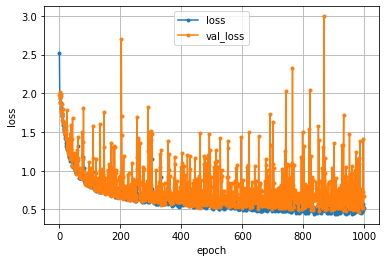

In [34]:
# 学習経過の可視化(大きさ)
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [35]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.02459016393442623
大きさ2の正答率：0.8650793650793651
大きさ3の正答率：0.83
大きさ4の正答率：0.7291666666666666
大きさ5の正答率：0.6105263157894737


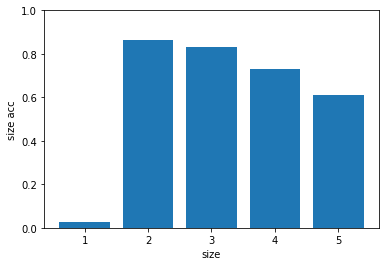

In [36]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [37]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.09016393442622951
大きさ2の正答率：0.9047619047619048
大きさ3の正答率：0.68
大きさ4の正答率：0.53125
大きさ5の正答率：0.29473684210526313


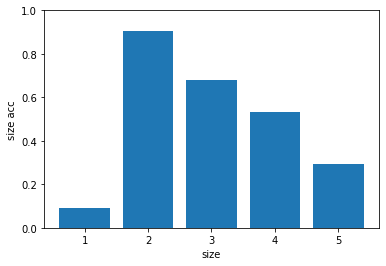

In [38]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [39]:
one_predict = []
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
for i in range(len(size_y_test)):
    if size_answer[i] == 1:
        one_predict.append(size_predict[i][0])
print(one_predict)

[1.2134696, 1.6661559, 1.7480451, 1.6204435, 2.6542702, 1.7087451, 1.8479491, 1.0290567, 2.7077856, 2.126976, 1.7083312, 1.964408, 1.6251241, 2.0236492, 1.720832, 1.21725, 1.6554977, 1.6818658, 1.7969505, 1.6366035, 1.6814986, 1.7662688, 1.579753, 1.9947568, 1.7457267, 1.7089206, 1.6414806, 1.672558, 1.8195792, 1.7441398, 1.7856637, 3.0185757, 1.6428863, 1.6718379, 1.8187362, 1.744773, 1.637354, 1.6334411, 1.7026016, 1.6644737, 1.396165, 1.6115981, 1.6678954, 1.6630441, 1.7100984, 1.650798, 1.6587573, 1.6584817, 1.632682, 1.7165157, 1.8138019, 1.6055204, 1.6478244, 1.6882316, 1.6580936, 1.7068864, 1.7117435, 1.6997224, 1.6153814, 1.9441501, 1.6806346, 1.6944858, 1.7074653, 1.6938506, 1.6621333, 1.6572744, 1.7638847, 1.4912664, 1.6455861, 1.8059932, 1.9989825, 1.8530065, 2.101304, 1.7473212, 1.6424419, 1.6714889, 1.6408712, 1.5341579, 1.0337774, 1.3965389, 1.6633931, 1.3242122, 1.9347316, 1.7020284, 1.71093, 1.7353288, 1.7121478, 1.6559955, 1.4930831, 1.8081199, 1.5703565, 1.6714164, 1.

In [ ]:
# CNNモデルで位置推定
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(2, activation="linear")(cnn)

# モデル定義とコンパイル
cnn_position_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_position_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_position_model.summary()
plot_model(cnn_position_model, show_shapes=True, show_layer_names=False)